In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [108]:
# Load data and clean up
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data.columns = ['label', 'text']

In [109]:
# Label encoding
data["label"] = data["label"].map({'ham': 0, 'spam': 1})


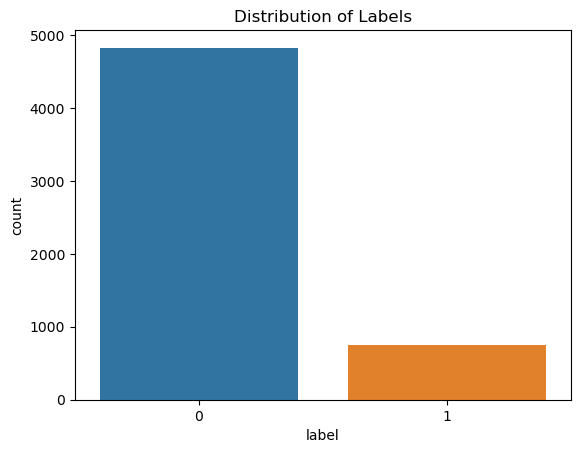

In [110]:
# Visualize the label distribution
sns.countplot(x=data['label'])
plt.title("Distribution of Labels")
plt.show()

In [111]:
# Text preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    filtered_tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(filtered_tokens)

# Apply text preprocessing
data['clean_text'] = data['text'].apply(preprocess_text)


In [112]:
# TF-IDF Vectorization with n-grams and additional filtering
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=5)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text'])

X = tfidf_matrix
y = data['label']

In [113]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [114]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [115]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [116]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # For ROC and AUC


In [117]:
# Evaluation metrics
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


F1 Score: 0.9536784741144414
ROC AUC Score: 0.9949324523943814
[[970  15]
 [ 70 875]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       985
           1       0.98      0.93      0.95       945

    accuracy                           0.96      1930
   macro avg       0.96      0.96      0.96      1930
weighted avg       0.96      0.96      0.96      1930



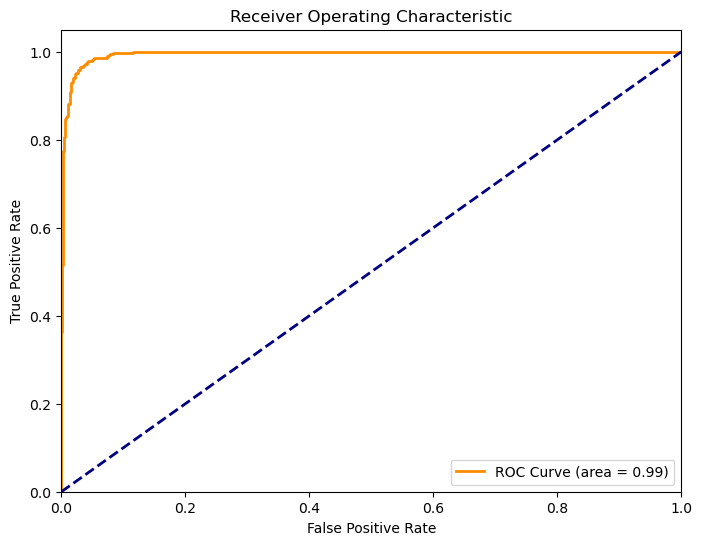

In [118]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


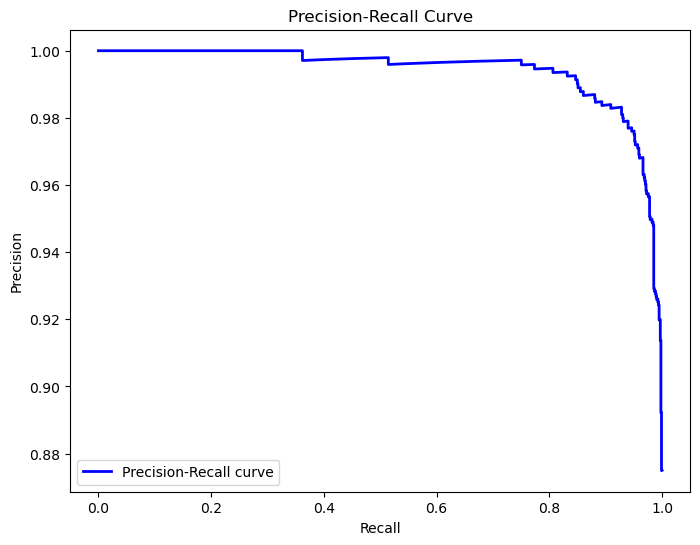

In [119]:
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()